- pip install pandas (cmd창에서 실행)

# 1절 판다스 패키지
- 데이터 분석을 위한 반드시 알아야 할 패키지. 넘파이를 기반으로 하며, 다른 라이브러리와 잘 통합되어 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 결측치처리, 크기변경(열삭제/추가, 행삭제/추가), 데이터정렬, 데이터문할/병합, 통계처리, 부분데이터추출, 파일입출력, 레이블링, 시각화용이, ...

In [1]:
import numpy as np
np.pi

3.141592653589793

In [2]:
import pandas as pd
pd.__version__

'2.1.4'

In [3]:
data = pd.read_json('data/ch10_member1.json', encoding="CP949")
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [4]:
data = pd.read_json('data/ch10_member2.json')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [5]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, names=['name', 'age', 'email', 'address'], encoding="utf-8")
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


# 2절 데이터프레임 
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [6]:
d = {'name':['홍길동', '신길동'], 'age':[20,30]}
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용하여 데이터 프레임 만들기

In [7]:
d = [{'name':'홍길동', 'age':20}, {'name':'신길동', 'age':30}]
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.3 read_csv()

In [8]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding="CP949")
df.shape # 행, 열

(17, 22)

In [9]:
df.head() # 상위 5줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [10]:
pd.options.display.max_columns # 최대 데이터프레임의 표현될 수 있는 열 수

20

In [11]:
pd.options.display.max_columns = 22
df.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695


## 2.4 sklearn, statsmodels, searborn 등의 라이브러리에서 데이터프레임 불러오기

In [12]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets").data
iris.tail() # 끝 5항

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절 이름 (열, 행) 지정하기

In [13]:
member_df = pd.read_csv('data/ch09_member1.csv', header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [14]:
# 열이름 지정하기
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [15]:
member_df = pd.concat([member_df, member_df])
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [16]:
# 행이름 지정하기
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [17]:
member_df.index = range(len(member_df))
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,부산시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [18]:
# name을 행이름
member_df.set_index("name")
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,부산시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [19]:
#member_df.reset_index()
member_df.reset_index(inplace=True) # reset을 member_df에 적용

In [20]:
member_df

,index,name,age,email,address
0,0,홍길동,20,hong@hong.com,서울시 강동구
1,1,박길서,33,park@hong.com,부산시 강서구
2,2,박길남,23,gil@hong.com,서울시 강남구
3,3,김길북,20,kim@hong.com,서울시 강북구
4,4,신길서,40,park@hong.com,서울시 강서구
5,5,신길동,28,park@hong.com,서울시 강서구
6,6,홍길동,20,hong@hong.com,서울시 강동구
7,7,박길서,33,park@hong.com,부산시 강서구
8,8,박길남,23,gil@hong.com,서울시 강남구
9,9,김길북,20,kim@hong.com,서울시 강북구


In [21]:
name = member_df['name'] # 시리즈
print(type(name))
name

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     박길남
3     김길북
4     신길서
5     신길동
6     홍길동
7     박길서
8     박길남
9     김길북
10    신길서
11    신길동
Name: name, dtype: object

In [22]:
member = member_df.loc[0] # 0번 인덱스 행 => 시리즈
print(type(member))
member

<class 'pandas.core.series.Series'>


index                  0
name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [23]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    12 non-null     int64 
 1   name     12 non-null     object
 2   age      12 non-null     int64 
 3   email    12 non-null     object
 4   address  12 non-null     object
dtypes: int64(2), object(3)
memory usage: 612.0+ bytes


In [24]:
member_df['age'] = member_df['age'].astype('float64') # 데이터 프레임의 열의 타입을 변경

In [25]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    12 non-null     int64  
 1   name     12 non-null     object 
 2   age      12 non-null     float64
 3   email    12 non-null     object 
 4   address  12 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 612.0+ bytes


# 4절 부분 데이터 조회
- 특정열, 특정행, 특정행의 특정열, 특정조건의 행 모든 열, 특정조건의 행의 특정열

In [26]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


## 4.1 단일열 조회

In [27]:
member['name'].to_frame() #시리즈를 데이터 프레임으로

,name
0,홍길동
1,박길서
2,박길남
3,김길북
4,신길서
5,신길동


## 4.2 loc[]을 이용한 이름(열, 행)으로 조회
- 단일행, 여러행, 여러열, 행과 열을 동시에 접근
- member.loc[행(행 슬라이싱), 열(열 슬라이싱)]

In [28]:
member.loc[0] # 시리즈

name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [29]:
# 여러행
member.loc[0:5] # 0행부터 5행까지

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [30]:
# 여러열 # name열부터 email열까지 (age열 포함)
member.loc[:, 'name':'email'] 

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,park@hong.com
5,신길동,28,park@hong.com


In [31]:
# 여러열(name열과 email열)
member.loc[:, ['name', 'email']]

,name,email
0,홍길동,hong@hong.com
1,박길서,park@hong.com
2,박길남,gil@hong.com
3,김길북,kim@hong.com
4,신길서,park@hong.com
5,신길동,park@hong.com


In [32]:
# 1행부터 4행까지 name과 email
member.loc[1:4, ['name', 'email']]

,name,email
1,박길서,park@hong.com
2,박길남,gil@hong.com
3,김길북,kim@hong.com
4,신길서,park@hong.com


In [33]:
# 1행부터 4행까지 name, email, address 출력
member.loc[ [1, 2],['name', 'email', 'address'] ]

,name,email,address
1,박길서,park@hong.com,부산시 강서구
2,박길남,gil@hong.com,서울시 강남구


In [34]:
# 1행부터 4행까지 name열부터 email열까지 출력
member.loc[ 1:4, 'name':'email'] # loc사용시 index이름과 column이름을 사용

,name,age,email
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,park@hong.com


## 4.3 iloc[]을 이용한 숫자(인덱스)로 조회
- 몇번째 행부터 몇번째 행 앞까지, 몇번째 열부터 몇번째 열 앞까지 음수가능

In [35]:
member.iloc[0:4] # 슬라이싱 from:to:step -> from부터 to앞까지 step씩

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [36]:
member.iloc[0, 0:3] # 0열부터 3열 앞까지

name               홍길동
age                 20
email    hong@hong.com
Name: 0, dtype: object

In [37]:
# 맨 오른쪽 열을 제외하고 출력
member.iloc[:, :-1]

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,park@hong.com
5,신길동,28,park@hong.com


In [38]:
# 0, 2, 4, 6 ... 짝수번째 행의 모든 열출력
member.iloc[::2, 0:2]

,name,age
0,홍길동,20
2,박길남,23
4,신길서,40


In [39]:
# member의 행순서를 역순 출력(맨 마지막 열을 제외하고)
member.iloc[::-1, :-1]

,name,age,email
5,신길동,28,park@hong.com
4,신길서,40,park@hong.com
3,김길북,20,kim@hong.com
2,박길남,23,gil@hong.com
1,박길서,33,park@hong.com
0,홍길동,20,hong@hong.com


## 4.4 조건으로 조회하기

In [40]:
# 30살 이상의 데이터 출력
member.loc[member['age']>30] # 인덱스 대신 조건

,name,age,email,address
1,박길서,33,park@hong.com,부산시 강서구
4,신길서,40,park@hong.com,서울시 강서구


In [41]:
address = "서울시 강동구"
address.find('강동구')

4

In [42]:
# 시리즈에 문자함수
# https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling
member['address'].str.find('강서구') == -1

0     True
1    False
2     True
3     True
4    False
5    False
Name: address, dtype: bool

In [43]:
# address가 '강서구'인 데이터의 name, age, address를 출력
member.loc[member['address'].str.find('강서구')!=-1, ['name', 'age', 'address']]

,name,age,address
1,박길서,33,부산시 강서구
4,신길서,40,서울시 강서구
5,신길동,28,서울시 강서구


In [44]:
# 결측지 확인
member.isna().sum()

name       0
age        0
email      0
address    0
dtype: int64

In [45]:
# iris
import seaborn as sns
iris_df = sns.load_dataset('iris')
# 0 ~ 49 setosa / 50 ~ 99 sersicolor / 100 ~ 149 virginica
iris_df.loc[100:149].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [46]:
# species가 versicolor인 데이터 상위 5개의 모든열
iris_df[iris_df['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [47]:
# species가 versicolor인 데이터의 맨마지막 열을 제외한 데이터
iris_df.iloc[:, :-1][iris_df['species'] == 'versicolor']

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [48]:
# sepal.length가 6.2보다 크고, species가 versicolor인 데이터들 출력
iris_df[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [49]:
# sepal.length가 6.2보다 크고, species가 versicolor인 데이터의 sepal_length와 species, sepal_width를 출력
iris_df.loc[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2), ['sepal_length', 'sepal_width', 'species']]

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


# 5절 데이터 추가 및 삭제

In [50]:
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [51]:
import numpy as np
member['major'] = ['컴공', '전기', '전자', '기계', 'AI', np.nan] 
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,33,park@hong.com,부산시 강서구,전기
2,박길남,23,gil@hong.com,서울시 강남구,전자
3,김길북,20,kim@hong.com,서울시 강북구,기계
4,신길서,40,park@hong.com,서울시 강서구,AI
5,신길동,28,park@hong.com,서울시 강서구,NaN


In [52]:
hobby = pd.DataFrame({'hobby':['놀기', '자기', '읽기', '먹기', '공부', '명상']})
hobby

,hobby
0,놀기
1,자기
2,읽기
3,먹기
4,공부
5,명상


In [53]:
member = pd.concat([member, hobby], axis=1)
member

,name,age,email,address,major,hobby
0,홍길동,20,hong@hong.com,서울시 강동구,컴공,놀기
1,박길서,33,park@hong.com,부산시 강서구,전기,자기
2,박길남,23,gil@hong.com,서울시 강남구,전자,읽기
3,김길북,20,kim@hong.com,서울시 강북구,기계,먹기
4,신길서,40,park@hong.com,서울시 강서구,AI,공부
5,신길동,28,park@hong.com,서울시 강서구,NaN,명상


In [54]:
member.drop(['hobby', 'major'], axis=1, inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [55]:
# 행삭제

# 6절 정렬

In [56]:
member.sort_index(ascending=False, inplace=True, axis=0) # 인덱스로 정렬
member

,name,age,email,address
5,신길동,28,park@hong.com,서울시 강서구
4,신길서,40,park@hong.com,서울시 강서구
3,김길북,20,kim@hong.com,서울시 강북구
2,박길남,23,gil@hong.com,서울시 강남구
1,박길서,33,park@hong.com,부산시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


In [57]:
# 특정열의 값 기준 정렬
member.sort_values(by=['name', 'age'], inplace=True)
member

,name,age,email,address
3,김길북,20,kim@hong.com,서울시 강북구
2,박길남,23,gil@hong.com,서울시 강남구
1,박길서,33,park@hong.com,부산시 강서구
5,신길동,28,park@hong.com,서울시 강서구
4,신길서,40,park@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


# 7절 기초통계 분석
- count : NA(결측치)를 제외한 갯수
- min
- max
- sum
- mean
- std : 표준편차
- var : 분산
- quantile : 분위수 (1사분위수, 2사분위수, 3사분위수)
- median
- corr : 상관관계

In [58]:
iris_df.iloc[:,:-1].min(axis=1) # 행마다 모든 열의 최솟값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [59]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [60]:
iris_df.iloc[:, :-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [61]:
iris_df.describe() # 수치형 데이터의 갯수, 평균, 표준편차, 최소 최대, 사분위수

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
iris_df['species'].describe() # 범주형 데이터

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [63]:
iris_df.describe(include='all') # 수치형과 범주형 데이터 모두 describe

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [64]:
iris_df[iris_df['species'].isna()] # species가 결측치인 행을 출력

,sepal_length,sepal_width,petal_length,petal_width,species


# 8절 그룹화

In [65]:
iris_df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [66]:
iris_group = iris_df.groupby(['species'])
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 연습문제

In [67]:
import seaborn as sns
iris = sns.load_dataset("iris")
# iris.sample(1)

In [68]:
# iris 데이터에서 처음 다섯개 행만 출력하세요
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
r = iris.iloc[:,:-1].corr()
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

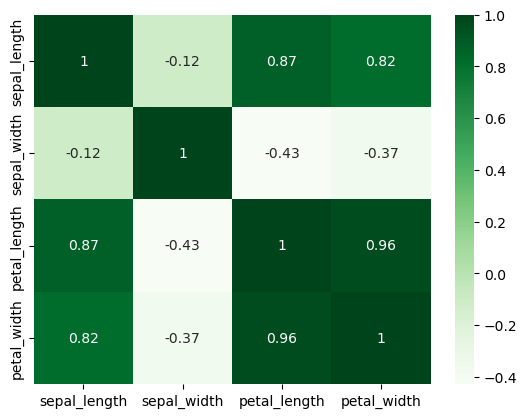

In [70]:
import seaborn as sns
sns.heatmap(r, annot=True, cmap="Greens")
# seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트에서 pip install seaborn --upgrade
# seaborn 라이브러리 업그레이드 확인 : pip show seaborn

<Axes: >

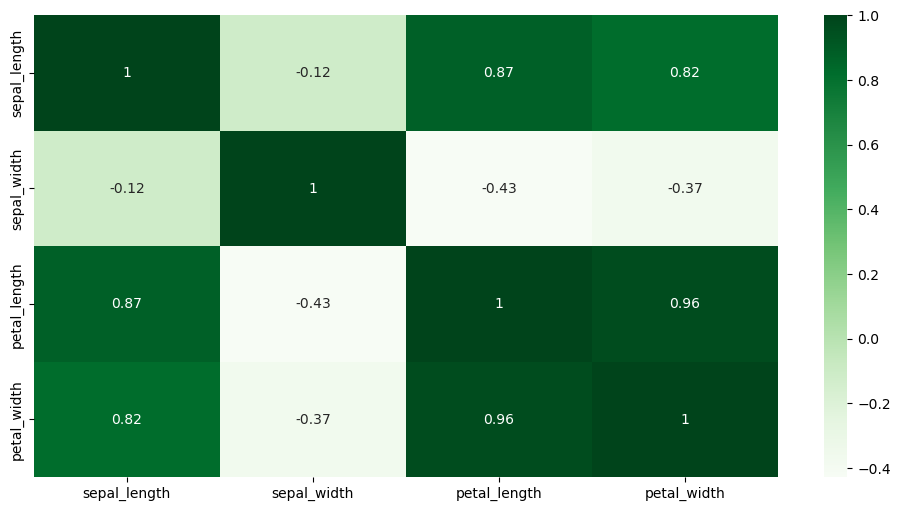

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) # 그래프 크기
sns.heatmap(r, annot=True, cmap="Greens")
# seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트에서 pip install seaborn --upgrade
# seaborn 라이브러리 업그레이드 확인 : pip show seaborn